# OBJECTIVE

Just for fun with Kmeans I have created a dataset of NPTEL_LECTURES ON DATA ANALYTICS WITH PYTHON by IIT Roorkee.
Here I try to find clusters of lectures based on Views and likes by students.
The data set is created by me and views ,like are upto 14 dec 2022.

Happy Learning!!!!!!


# Importing data set and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df=pd.read_excel(r'C:\Users\esvit\Downloads\Downloads\data science\data analytic python nptel\Nptel_lecture_data.xlsx')
df.head()

,Topic,Views,Likes,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Introductory on course,261000,1700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Lec 1, Introduction to Data Analytics",366000,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Lec 2, Python Fundamentals -I",158000,941,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Lec 3, Python Fundamentals -II",96000,556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Lec 4, Central Tendency and Dispersion - I",86000,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(61, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Topic       61 non-null     object 
 1   Views       61 non-null     int64  
 2   Likes       61 non-null     int64  
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  0 non-null      float64
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
 9   Unnamed: 9  1 non-null      float64
dtypes: float64(7), int64(2), object(1)
memory usage: 4.9+ KB


# data preprocessing

In [33]:
df.drop(df.iloc[:,3:],inplace=True,axis=1)

In [34]:
df

,Topic,Views,Likes
0,Introductory on course,261000,1700
1,"Lec 1, Introduction to Data Analytics",366000,3000
2,"Lec 2, Python Fundamentals -I",158000,941
3,"Lec 3, Python Fundamentals -II",96000,556
4,"Lec 4, Central Tendency and Dispersion - I",86000,489
...,...,...,...
56,"Lec 56, Hierarchical method of clustering- II",5300,33
57,"Lec 57, Classification and Regression Trees (C...",7900,53
58,"Lec 58, Measures of attribute selection",5400,42
59,"Lec 59, Attribute selection Measures in CART : II",5700,35


In [35]:
d=df.copy(deep=True)
d

,Topic,Views,Likes
0,Introductory on course,261000,1700
1,"Lec 1, Introduction to Data Analytics",366000,3000
2,"Lec 2, Python Fundamentals -I",158000,941
3,"Lec 3, Python Fundamentals -II",96000,556
4,"Lec 4, Central Tendency and Dispersion - I",86000,489
...,...,...,...
56,"Lec 56, Hierarchical method of clustering- II",5300,33
57,"Lec 57, Classification and Regression Trees (C...",7900,53
58,"Lec 58, Measures of attribute selection",5400,42
59,"Lec 59, Attribute selection Measures in CART : II",5700,35


In [36]:
d=d.iloc[:,1:]
d.head()

,Views,Likes
0,261000,1700
1,366000,3000
2,158000,941
3,96000,556
4,86000,489


In [37]:
from sklearn.cluster import KMeans

In [45]:
import warnings 
warnings.filterwarnings('ignore')

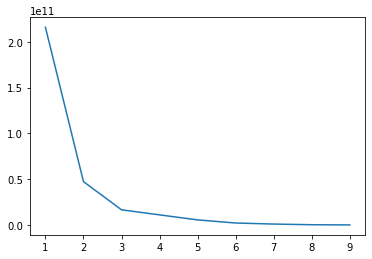

In [46]:
#elbow methoed
n=list(range(1,10))
ssd=[]
for i in n:
    model=KMeans(n_clusters=i)
    model.fit(d)
    ssd.append(model.inertia_)
plt.plot(n,ssd)

In [39]:
k=KMeans(n_clusters=2)
k.fit(d)
k.labels_

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [40]:
labels=k.predict(d)

In [41]:
df['cluster']=labels
df

,Topic,Views,Likes,cluster
0,Introductory on course,261000,1700,1
1,"Lec 1, Introduction to Data Analytics",366000,3000,1
2,"Lec 2, Python Fundamentals -I",158000,941,1
3,"Lec 3, Python Fundamentals -II",96000,556,0
4,"Lec 4, Central Tendency and Dispersion - I",86000,489,0
...,...,...,...,...
56,"Lec 56, Hierarchical method of clustering- II",5300,33,0
57,"Lec 57, Classification and Regression Trees (C...",7900,53,0
58,"Lec 58, Measures of attribute selection",5400,42,0
59,"Lec 59, Attribute selection Measures in CART : II",5700,35,0


In [42]:
df_1=df[df.cluster==1]
df_0=df[df.cluster==0]


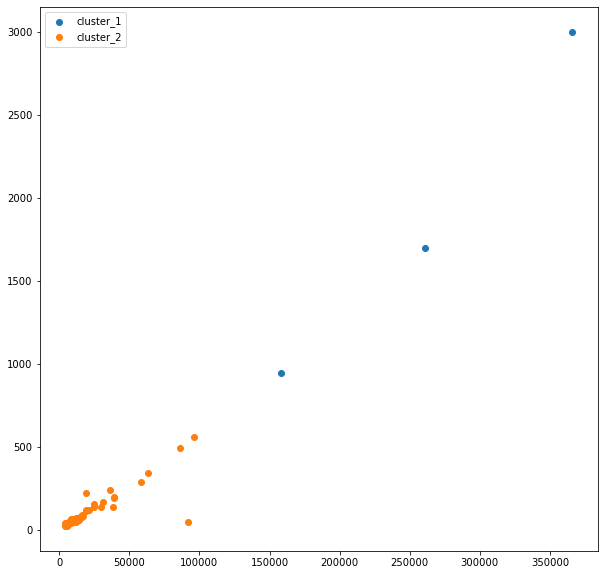

In [43]:
plt.figure(figsize=(10,10))
plt.scatter(x=df_1['Views'],y=df_1['Likes'],label='cluster_1')
plt.scatter(x=df_0['Views'],y=df_0['Likes'],label='cluster_2')
plt.legend()
plt.show()


# OBSERVATION

As observed only the first three lectures are mostly viewed and liked and form a cluster.
rest of the lectures are having their own in ornage.
Although,Lectures are good to have knowledge on ML and Data analytics but requires immense amount of PATIENCE AND PERSEVERENCE.